In [1]:
%%time
import os
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

CPU times: total: 3.08 s
Wall time: 4.53 s


In [2]:
#! pip install tensorflow

In [3]:
%%time
quina = pd.read_excel("HIST_SORTEIOS_QUINA.xlsx")

CPU times: total: 1.08 s
Wall time: 1.27 s


In [4]:
quina2 = quina[(quina['Data Sorteio']>='2000-01-01') ]

In [5]:
quina2.head()

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena
643,644,2000-01-04,12,27,28,34,49
644,645,2000-01-06,2,15,22,25,74
645,646,2000-01-08,3,8,36,44,63
646,647,2000-01-11,19,43,52,59,74
647,648,2000-01-13,24,31,39,60,72


In [6]:
quina2.dtypes

Concurso                 int64
Data Sorteio    datetime64[ns]
1ª Dezena                int64
2ª Dezena                int64
3ª Dezena                int64
4ª Dezena                int64
5ª Dezena                int64
dtype: object

In [7]:
quina2.shape

(5528, 7)

In [8]:
a = quina2[['1ª Dezena','2ª Dezena','3ª Dezena','4ª Dezena','5ª Dezena']].values

In [9]:
a.sort(axis=1)  # no ascending argument

In [10]:
df = pd.DataFrame(a, quina2.index, ['1ª Dezena','2ª Dezena','3ª Dezena','4ª Dezena','5ª Dezena'])

In [11]:
df.head()

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena
643,12,27,28,34,49
644,2,15,22,25,74
645,3,8,36,44,63
646,19,43,52,59,74
647,24,31,39,60,72


In [12]:
df.reset_index(inplace=True)

In [13]:
df.rename(columns={'index':'Concurso'},inplace=True)

In [14]:
df2 = quina2[['Concurso','Data Sorteio']].merge(df, on='Concurso')

In [15]:
df2.head()

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena
0,644,2000-01-04,2,15,22,25,74
1,645,2000-01-06,3,8,36,44,63
2,646,2000-01-08,19,43,52,59,74
3,647,2000-01-11,24,31,39,60,72
4,648,2000-01-13,29,38,71,73,78


In [16]:
df2['dia']        = df2['Data Sorteio'].dt.day
df2['mes']        = df2['Data Sorteio'].dt.month
df2['ano']        = df2['Data Sorteio'].dt.year
df2['semana_ano'] = df2['Data Sorteio'].dt.isocalendar().week
df2['dia_semana'] = df2['Data Sorteio'].dt.dayofweek

#applying leads and lags by shifting dataframe column up and down respectively
#df2['1ª Dez Lag'] = df2['1ª Dezena'].shift(1)
#df2['2ª Dez Lag'] = df2['2ª Dezena'].shift(1)
#df2['3ª Dez Lag'] = df2['3ª Dezena'].shift(1)
#df2['4ª Dez Lag'] = df2['4ª Dezena'].shift(1)
#df2['5ª Dez Lag'] = df2['5ª Dezena'].shift(1)

<Axes: xlabel='Data Sorteio'>

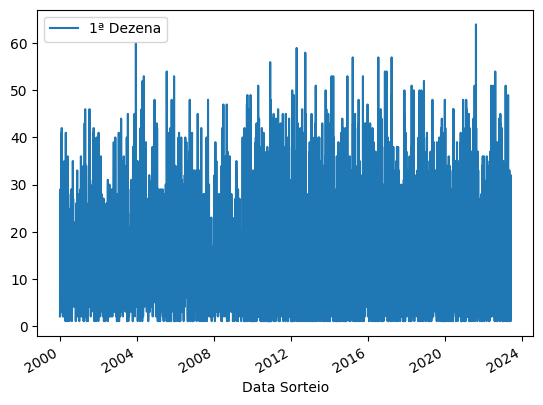

In [17]:
import matplotlib.pyplot as plt
df2.plot( 'Data Sorteio' , '1ª Dezena' )

In [18]:
import calendar
import jewishcalendar

In [19]:
def getJewishMonthName(month, year):
  if month == 1:
    return "Nisan"
  elif month == 2:
    return "Iyyar"
  elif month == 3:
    return "Sivan"
  elif month == 4:
    return "Tammuz"
  elif month == 5:
    return "Av"
  elif month == 6:
    return "Elul"
  elif month == 7:
    return "Tishri"
  elif month == 8:
    return "Heshvan"
  elif month == 9:
    return "Kislev"
  elif month == 10:
    return "Teveth"
  elif month == 11:
    return "Shevat"
  elif month == 12:
    if jewishcalendar.hebrew_leap(year):
      return "Adar I"
    else:
      return "Adar"
    
  elif month == 13:
    return "Adar II"

In [20]:
absdate = jewishcalendar.gregorian_to_absdate(2023, 1, 1)
hebYear, hebMonth, hebDay = jewishcalendar.absdate_to_hebrew(absdate)

In [21]:
print(hebYear, hebMonth, hebDay)

5783 10 8


In [22]:
#df2['absdate'] = jewishcalendar.gregorian_to_absdate(df2['ano'], df2['mes'], df2['dia'])
#df2['hebYear'], df2['hebMonth'], df2['hebDay'] = jewishcalendar.absdate_to_hebrew(df2['absdate'] )
#df2['absdate'] = df2[['ano','mes','dia']].applymap(jewishcalendar.gregorian_to_absdate, args=(1,2) ) 

In [23]:
hebYear  = [] 
hebMonth = [] 
hebDay  = [] 

for index, row in df2[['ano','mes','dia']].iterrows():
    valor = jewishcalendar.gregorian_to_absdate(row['ano'],row['mes'],row['dia'])
    df2.at[index, 'hebYear'], df2.at[index, 'hebMonth'] , df2.at[index, 'hebDay'] = jewishcalendar.absdate_to_hebrew(valor)


In [24]:
#df3 = pd.DataFrame( [hebYear,hebMonth,hebDay], df2.index, ['hebYear','hebMonth','hebDay'])

In [25]:
df2.head()

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,dia,mes,ano,semana_ano,dia_semana,hebYear,hebMonth,hebDay
0,644,2000-01-04,2,15,22,25,74,4,1,2000,1,1,5760.0,10.0,26.0
1,645,2000-01-06,3,8,36,44,63,6,1,2000,1,3,5760.0,10.0,28.0
2,646,2000-01-08,19,43,52,59,74,8,1,2000,1,5,5760.0,11.0,1.0
3,647,2000-01-11,24,31,39,60,72,11,1,2000,2,1,5760.0,11.0,4.0
4,648,2000-01-13,29,38,71,73,78,13,1,2000,2,3,5760.0,11.0,6.0


In [84]:
#df2 = quina2[['Concurso','Data Sorteio']].merge(df, on='Concurso')
#df.rename(columns={'index':'Concurso'},inplace=True)
#df.reset_index(inplace=True)

In [101]:
df2[['1ª Dezena','hebMonth']][(df2['hebMonth']==5) | (df2['hebDay']==5)].groupby('1ª Dezena').count().sort_values(by='hebMonth',ascending=False).head()

,hebMonth
1ª Dezena,
4,40
5,38
2,35
3,34
1,31


In [97]:
df2[['2ª Dezena','hebMonth']][(df2['hebMonth']==5) | (df2['hebDay']==5)].groupby('2ª Dezena').count().sort_values(by='hebMonth',ascending=False).head()

,hebMonth
2ª Dezena,
16,25
13,21
19,20
17,20
15,19


In [98]:
df2[['3ª Dezena','hebMonth']][(df2['hebMonth']==5) | (df2['hebDay']==5)].groupby('3ª Dezena').count().sort_values(by='hebMonth',ascending=False).head()

,hebMonth
3ª Dezena,
44,24
42,22
36,21
46,20
38,18


In [99]:
df2[['4ª Dezena','hebMonth']][(df2['hebMonth']==5) | (df2['hebDay']==5)].groupby('4ª Dezena').count().sort_values(by='hebMonth',ascending=False).head()

,hebMonth
4ª Dezena,
55,25
54,24
66,20
64,20
49,19


In [100]:
df2[['5ª Dezena','hebMonth']][(df2['hebMonth']==5) | (df2['hebDay']==5)].groupby('5ª Dezena').count().sort_values(by='hebMonth',ascending=False).head()

,hebMonth
5ª Dezena,
80,40
74,37
79,36
75,33
72,32


In [102]:
5+7+8+3

23